<a href="https://colab.research.google.com/github/Dasika-Vaishnavi/Appl/blob/main/Anime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project 

### importing packages

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

### neglecting warnings

In [2]:
import warnings

warnings.filterwarnings('ignore')

### importing data

In [9]:
test_df = pd.read_csv("/content/anime.csv")
train_df = pd.read_csv("/content/anime.csv")

In [10]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


### Data Exploration/Analysis

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


### Describing the data set

In [12]:
train_df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [13]:
train_df.head(8)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679


In [14]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
rating,230,1.9
genre,62,0.5
type,25,0.2
members,0,0.0
episodes,0,0.0


In [15]:
train_df.columns.values

array(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating',
       'members'], dtype=object)

In [19]:
genre = []
for ee in [str(ee).replace(' ', '').split(',') for ee in test_df.genre.values]:
    genre.extend(ee)
genre = [str(ee) for ee in np.unique(genre)]

In [20]:
anime_csv_dic = {}
for ii in range(test_df.shape[0]):
    anime_id = test_df.anime_id.values[ii]
    anime_name = test_df.name.values[ii]
    anime_csv_dic[anime_id] = anime_name

anime_csv_dic

{32281: 'Kimi no Na wa.',
 5114: 'Fullmetal Alchemist: Brotherhood',
 28977: 'Gintama°',
 9253: 'Steins;Gate',
 9969: 'Gintama&#039;',
 32935: 'Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou',
 11061: 'Hunter x Hunter (2011)',
 820: 'Ginga Eiyuu Densetsu',
 15335: 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare',
 15417: 'Gintama&#039;: Enchousen',
 4181: 'Clannad: After Story',
 28851: 'Koe no Katachi',
 918: 'Gintama',
 2904: 'Code Geass: Hangyaku no Lelouch R2',
 28891: 'Haikyuu!! Second Season',
 199: 'Sen to Chihiro no Kamikakushi',
 23273: 'Shigatsu wa Kimi no Uso',
 24701: 'Mushishi Zoku Shou 2nd Season',
 12355: 'Ookami Kodomo no Ame to Yuki',
 1575: 'Code Geass: Hangyaku no Lelouch',
 263: 'Hajime no Ippo',
 44: 'Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen',
 1: 'Cowboy Bebop',
 30276: 'One Punch Man',
 164: 'Mononoke Hime',
 7311: 'Suzumiya Haruhi no Shoushitsu',
 17074: 'Monogatari Series: Second Season',
 21939: 'Mushishi Zoku Shou',
 457: 'Mushish

In [26]:
rating_csv = pd.read_csv(('/content/anime.csv'))
print(rating_csv.shape)
rating_csv.head()

(12294, 7)


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [27]:
rating_csv2 = rating_csv.loc[rating_csv.rating.values != -1]
rating_csv2.shape
rating_csv2.head(100)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
95,14719,JoJo no Kimyou na Bouken (TV),"Action, Adventure, Shounen, Supernatural, Vampire",TV,26,8.51,190197
96,9756,Mahou Shoujo Madoka★Magica,"Drama, Magic, Psychological, Thriller",TV,12,8.51,462974
97,10165,Nichijou,"Comedy, School, Slice of Life",TV,26,8.52,254436
98,13601,Psycho-Pass,"Action, Police, Psychological, Sci-Fi",TV,22,8.50,509109


In [31]:
user_dic = {}
for ee in np.unique(test_df.anime_id.values):
    user_dic[ee] = 'user_id-' + str(ee)

len(user_dic)

12294

### Visual Exploration

In [35]:
data= pd.read_csv("/content/anime.csv")

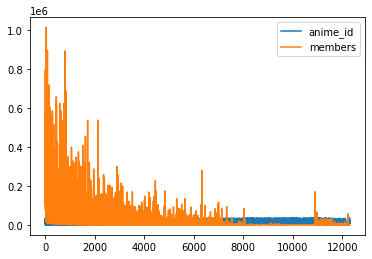

In [36]:
data_new= data.loc[:,["anime_id","members"]]
data_new.plot()
plt.show()

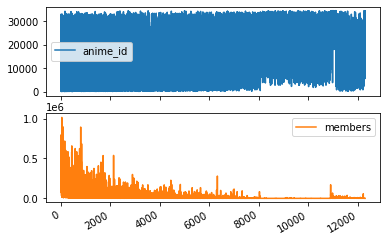

In [37]:
data_new.plot(subplots=True)
plt.show()

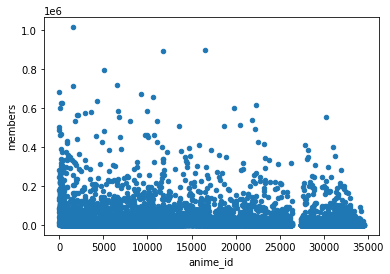

In [38]:
data_new.plot(kind="scatter",x="anime_id",y="members")
plt.show()

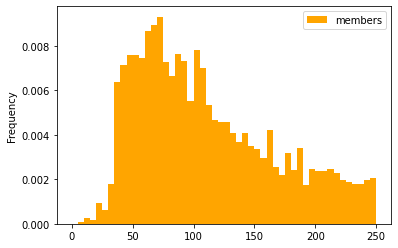

In [39]:
data_new.plot(kind="hist",y="members",bins=50, range=(0,250), density=True,color="orange")
plt.show()

### pclass

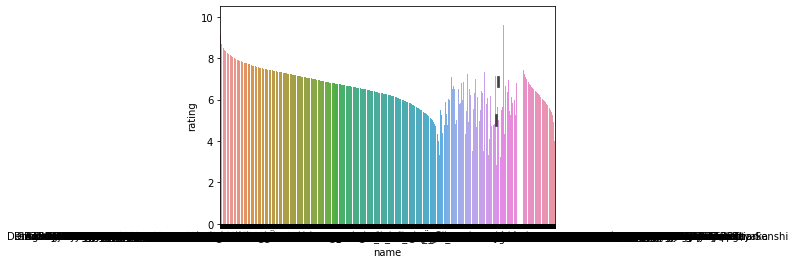

In [42]:
sns.barplot(x='name', y='rating', data=train_df)

### Data Preprocessing

In [46]:
train_df = train_df.drop(['anime_id'], axis=1)

In [47]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      12294 non-null  object 
 1   genre     12232 non-null  object 
 2   type      12269 non-null  object 
 3   episodes  12294 non-null  object 
 4   rating    12064 non-null  float64
 5   members   12294 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 576.4+ KB


In [49]:
# close warning
import warnings
warnings.filterwarnings("ignore")

data2 = trai_df.head()
date_list = ["1996-12-11","1996-11-12","1996-10-13","1996-08-14","1996-09-15"]
datetime_object = pd.to_datetime(date_list)
data2["date"] = datetime_object

data2= data2.set_index("date")
data2 

,anime_id,name,genre,type,episodes,rating,members
date,,,,,,,
1996-12-11,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1996-11-12,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
1996-10-13,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
1996-08-14,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
1996-09-15,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [50]:
print(data2.loc["1996-10-13"])
print("*************************")
print(data2.loc["1996-08-14":"1996-09-15"])


            anime_id      name  ... rating members
date                            ...               
1996-10-13     28977  Gintama°  ...   9.25  114262

[1 rows x 7 columns]
*************************
            anime_id           name  ... rating members
date                                 ...               
1996-08-14      9253    Steins;Gate  ...   9.17  673572
1996-09-15      9969  Gintama&#039;  ...   9.16  151266

[2 rows x 7 columns]


In [52]:
data2.resample("A").mean() # A= "year" M="month"

,anime_id,rating,members
date,,,
1996-12-31,17118.8,9.242,386679.0


In [53]:
data2.resample("M").mean()

,anime_id,rating,members
date,,,
1996-08-31,9253,9.17,673572
1996-09-30,9969,9.16,151266
1996-10-31,28977,9.25,114262
1996-11-30,5114,9.26,793665
1996-12-31,32281,9.37,200630


In [54]:
data2.resample("M").first().interpolate("linear")

,anime_id,name,genre,type,episodes,rating,members
date,,,,,,,
1996-08-31,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
1996-09-30,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
1996-10-31,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
1996-11-30,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
1996-12-31,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630


In [55]:
data2.resample("M").mean().interpolate("linear")

,anime_id,rating,members
date,,,
1996-08-31,9253,9.17,673572
1996-09-30,9969,9.16,151266
1996-10-31,28977,9.25,114262
1996-11-30,5114,9.26,793665
1996-12-31,32281,9.37,200630


In [56]:
data = pd.read_csv('/content/anime.csv')
print(data.index.name)

None


In [57]:
data.index.name="#"
data.head()

,anime_id,name,genre,type,episodes,rating,members
#,,,,,,,
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [58]:
data["anime_id"][1]

5114

In [59]:
data.anime_id[1]

5114

In [60]:
data[["anime_id","members"]]

,anime_id,members
#,,
0,32281,200630
1,5114,793665
2,28977,114262
3,9253,673572
4,9969,151266
...,...,...
12289,9316,211
12290,5543,183
12291,5621,219


In [61]:
#slicing data frame
print(type(data["rating"]))     # series
print(type(data[["rating"]]))   # data frames

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [62]:
# Slicing and indexing series
data.loc[1:6,"anime_id":"rating"]  

,anime_id,name,genre,type,episodes,rating
#,,,,,,
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13


In [63]:
# Reverse slicing 
data.loc[7:1:-1,"anime_id":"rating"] 

,anime_id,name,genre,type,episodes,rating
#,,,,,,
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26


In [64]:
# From something to end
data.loc[1:6,"genre":] 

,genre,type,episodes,rating,members
#,,,,,
1,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,"Sci-Fi, Thriller",TV,24,9.17,673572
4,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855


In [65]:
# Creating boolean series
boolean= data.rating > 9.11
data[boolean]

,anime_id,name,genre,type,episodes,rating,members
#,,,,,,,
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
9078,33607,Kahei no Umi,Historical,Movie,1,9.33,44
9595,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62


In [66]:
# Combining filters
b1= data.rating > 9.11
b2= data.anime_id < 15000
data [b1 & b2]

,anime_id,name,genre,type,episodes,rating,members
#,,,,,,,
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855


In [67]:
# Filtering column based others
data.anime_id[data.rating>9.2]

#
0        32281
1         5114
2        28977
9078     33607
9595     23005
10400    30120
10464    33662
10786    26313
Name: anime_id, dtype: int64

In [68]:
def div(n):
    return n/2
data.rating.apply(div)

#
0        4.685
1        4.630
2        4.625
3        4.585
4        4.580
         ...  
12289    2.075
12290    2.140
12291    2.440
12292    2.490
12293    2.730
Name: rating, Length: 12294, dtype: float64

In [69]:
data.rating.apply(lambda x:x/2)

#
0        4.685
1        4.630
2        4.625
3        4.585
4        4.580
         ...  
12289    2.075
12290    2.140
12291    2.440
12292    2.490
12293    2.730
Name: rating, Length: 12294, dtype: float64

In [70]:
# Defining column using other columns
data["total"] = data.anime_id + data.rating
data.head()

,anime_id,name,genre,type,episodes,rating,members,total
#,,,,,,,,
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,32290.37
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,5123.26
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,28986.25
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,9262.17
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,9978.16


In [71]:
data3 = data.copy()
data3.index = range(100,12394,1)
data3.head()

,anime_id,name,genre,type,episodes,rating,members,total
100,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,32290.37
101,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,5123.26
102,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,28986.25
103,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,9262.17
104,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,9978.16


In [72]:
data.head()

,anime_id,name,genre,type,episodes,rating,members,total
#,,,,,,,,
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,32290.37
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,5123.26
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,28986.25
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,9262.17
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,9978.16


In [73]:
# Setting index
data1 = data.set_index(["rating","type"]) 
data1.head(20)

,,anime_id,name,genre,episodes,members,total
rating,type,,,,,,
9.37,Movie,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",1,200630,32290.37
9.26,TV,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",64,793665,5123.26
9.25,TV,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",51,114262,28986.25
9.17,TV,9253,Steins;Gate,"Sci-Fi, Thriller",24,673572,9262.17
9.16,TV,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",51,151266,9978.16
9.15,TV,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",10,93351,32944.15
9.13,TV,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",148,425855,11070.13
9.11,OVA,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",110,80679,829.11
9.10,Movie,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",1,72534,15344.10


In [74]:
#pivoting -----> reshape tool
dic= {"name":["Kimi no Na wa","Gintama","Mushishi"],"rating":["9.17","8,15","6.6"],"episodes":["1", "51","26"]}
df=pd.DataFrame(dic)
df

,name,rating,episodes
0,Kimi no Na wa,9.17,1
1,Gintama,"8,15",51
2,Mushishi,6.6,26


In [75]:
df.pivot(index="name",columns="episodes",values="rating")

episodes,1,26,51
name,,,
Gintama,NaN,NaN,"8,15"
Kimi no Na wa,9.17,NaN,NaN
Mushishi,NaN,6.6,NaN


In [76]:
df1 =df.set_index(["name","rating"])
df1

,,episodes
name,rating,
Kimi no Na wa,9.17,1
Gintama,"8,15",51
Mushishi,6.6,26


In [77]:
#unstack 
df1.unstack(level=0)

episodes                       
name    Gintama Kimi no Na wa Mushishi
rating                                
6.6         NaN           NaN       26
8,15         51           NaN      NaN
9.17        NaN             1      NaN

In [78]:
df1.unstack(level=1)

episodes          
rating             6.6 8,15 9.17
name                            
Gintama            NaN   51  NaN
Kimi no Na wa      NaN  NaN    1
Mushishi            26  NaN  NaN

In [79]:
df2 = df1.swaplevel(0,1)
df2

,,episodes
rating,name,
9.17,Kimi no Na wa,1
"8,15",Gintama,51
6.6,Mushishi,26


In [80]:
df

,name,rating,episodes
0,Kimi no Na wa,9.17,1
1,Gintama,"8,15",51
2,Mushishi,6.6,26


In [81]:
# reverse pivoting
#df.pivot(index="name",columns="episodes",values="rating")
pd.melt(df,id_vars="name",value_vars=["episodes","rating"])

,name,variable,value
0,Kimi no Na wa,episodes,1
1,Gintama,episodes,51
2,Mushishi,episodes,26
3,Kimi no Na wa,rating,9.17
4,Gintama,rating,"8,15"
5,Mushishi,rating,6.6


In [82]:
data.groupby("type").mean()

,anime_id,rating,members,total
type,,,,
Movie,14898.067291,6.318058,10360.340716,14545.184406
Music,22445.547131,5.588996,1311.840164,22451.136127
ONA,23283.471927,5.643298,4114.030349,23177.350353
OVA,11322.082150,6.375221,5986.139837,11159.527428
Special,16666.279833,6.523501,7676.060859,16622.170419
TV,11966.169527,6.902299,42683.658305,11303.767458


In [83]:
data.groupby("type").rating.max()

type
Movie      10.00
Music       8.38
ONA         8.26
OVA         9.25
Special     8.66
TV          9.60
Name: rating, dtype: float64

In [84]:
data.groupby("type")[["rating","members"]].min() 

,rating,members
type,,
Movie,1.92,5
Music,3.28,24
ONA,2.58,25
OVA,2.00,17
Special,1.67,24
TV,2.67,12


## Building Machine Learning Models
### Recommender systems
On large databases, users may not know what to search for or they miss items that they could have liked. Recommender systems aim to help users find items that they may like in a large database.

### According to Google:

40% of app installs on Google Play come from recommendations.
60% of watch time on YouTube comes from recommendations.

In [109]:
anime = pd.read_csv("/content/anime.csv")

# the users rating dataset
user_ratings = pd.read_csv("/content/anime.csv")

In [110]:
print(anime.shape); anime.info()

(12294, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


The dataset on anime has about 12.3K anime and 7 columns. One of the columns is the name of the anime. We'll be using this later

In [111]:
print(user_ratings.shape); user_ratings.info()

(12294, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [112]:
print(user_ratings.shape); user_ratings.info()

(12294, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


The rating database has about 8 million rows and three columns: The user id, the anime id and the rating given by the user.

The rating column contains a -1 for those anime that a particular user watched but didn't rate. We'll start off our data prep by replacing these values with NaN's.

In [113]:
user_ratings.loc[user_ratings.rating == -1, "rating"] = np.nan

In [114]:
user_ratings.isnull().mean() 

anime_id    0.000000
name        0.000000
genre       0.005043
type        0.002034
episodes    0.000000
rating      0.018708
members     0.000000
dtype: float64

Next up, we'll look at the number of missing values in anime to get a good idea about what's happening over there.

In [115]:
anime.isnull().mean()

anime_id    0.000000
name        0.000000
genre       0.005043
type        0.002034
episodes    0.000000
rating      0.018708
members     0.000000
dtype: float64

In [117]:
# merging anime and user_ratings
user_ratings = pd.merge(user_ratings, anime, on = "anime_id")

# dropping the unnecessary columns
user_ratings.drop(["genre", "type", "episodes", "rating", "members"], axis = 1, inplace = True)

# renaming rating_x to rating
user_ratings.rename(columns = {"rating_x": "rating"}, inplace = True)

## Creating matrix of ratings
Now that we have the required data loaded, I can start with building the actual recommender system. The first step is to get the matrix of ratings from the data. We can use the pivot_table method of pd.DataFrame to get that.

In [119]:
# filtering out the first 5000 users
user_ratings = user_ratings[user_ratings.anime_id <= 1000]

In [120]:
user_ratings.head()

,anime_id,name_x,genre_x,type_x,episodes_x,rating,members_x,name_y,genre_y,type_y,episodes_y,rating_y,members_y,name
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679,Ginga Eiyuu Densetsu
12,918,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,201,9.04,336376,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,201,9.04,336376,Gintama
15,199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1,8.93,466254,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1,8.93,466254,Sen to Chihiro no Kamikakushi
20,263,Hajime no Ippo,"Comedy, Drama, Shounen, Sports",TV,75,8.83,157670,Hajime no Ippo,"Comedy, Drama, Shounen, Sports",TV,75,8.83,157670,Hajime no Ippo
21,44,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,"Action, Drama, Historical, Martial Arts, Roman...",OVA,4,8.83,129307,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,"Action, Drama, Historical, Martial Arts, Roman...",OVA,4,8.83,129307,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...


In [123]:
rating_matrix = user_ratings.pivot_table(values = "rating", index = "name", columns = "anime_id")

In [124]:
rating_matrix.shape

(906, 906)

## Sparese Matrix
The rating matrix we have here has a lot of missing values and only a few non missing values. This is what we call a sparese matrix. Our job is to predict those missing values.

We're going to finish up with our data preparation by filling out those missing values with 0's.

In [125]:
rating_matrix.fillna(0, inplace = True)

### For this particular Dataset oly SDG is possible out of the 8 models

## Stochastic Gradient Descent (SGD):

In [126]:
# setting to raise exceptions
np.seterr(all = "raise")

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [127]:
class MF():
    
    def __init__(self, rating_matrix, learning_rate = 0.01, reg_coef = 0.02, n_factors = 10,
                 n_epochs = 5):
        self.R = rating_matrix
        self.alpha = learning_rate
        self.reg_coef = reg_coef
        self.k = n_factors
        self.n_epochs = n_epochs
        self.n_users, self.n_items = self.R.shape
        
    def getTrainset(self):
        trainset = [(u, i, self.R[u, i]) for u in range(self.n_users) for i in range(self.n_items) if self.R[u, i] > 0]
        self.trainset =  trainset
        
    def fit(self):
        self.getTrainset()
        
        self.p = np.random.normal(0, 0.1, size = (self.n_users, self.k))
        self.q = np.random.normal(0, 0.1, size = (self.n_items, self.k))
        
        training_errors = []
        
        for epoch in range(self.n_epochs):
            np.random.shuffle(self.trainset)
            
            self.sgd()
            
            mse = self.mse()
            
            training_errors.append((epoch + 1, mse))
            
        self.training_errors = training_errors
        
    def mse(self):
        xs, ys = self.R.nonzero()
            
        predicted = self.getPredictedMatrix()
            
        err = 0
            
        for x, y in zip(xs, ys):
            err += ((self.R[x, y] - predicted[x, y]) ** 2)
                
        return np.sqrt(err)
        
    def sgd(self):
        for u, i, r_ui in self.trainset:
                
            prediction = np.dot(self.p[u, :], self.q[i, :].T)
            err = r_ui - prediction
                
                # updates
            self.p[u, :] += self.alpha * (err * self.q[i, :] - self.reg_coef * self.p[u, :])
            self.q[i, :] += self.alpha * (err * self.p[u, :] - self.reg_coef * self.q[i, :])
                
    def getPrediction(self, u, i):
        return np.dot(self.p[u, :], self.q[i, :].T)
        
    def getPredictedMatrix(self):
        return np.dot(self.p, self.q.T)

For computational efficiency, it's better to pass the rating matrix as a numpy array. So, I'll convert it into a numpy array and then run the training process.

In [128]:
# converting the rating matrix into a numpy array
R = np.array(rating_matrix)

In [129]:
mf = MF(rating_matrix = R, n_epochs = 10)

## Using Fit to work with ML model

In [130]:
mf.fit()

In [131]:
mf.training_errors

[(1, 216.73796229168448),
 (2, 216.29573766174326),
 (3, 215.83615674567218),
 (4, 215.34963478312346),
 (5, 214.82618316917834),
 (6, 214.25523002377133),
 (7, 213.625446437013),
 (8, 212.92457890135793),
 (9, 212.13929012823598),
 (10, 211.2550124131905)]

In [151]:
X_train = anime["rating"]
Y_train = anime["rating"]

# SUMMARY
We started with the data exploration where we got a feeling for the dataset, checked about missing data and learned which features are important. During this process we used seaborn and matplotlib to do the visualizations. During the data preprocessing part, we computed missing values, converted features into numeric ones, grouped values into categories and created a few new features. Then we discussed how Stochastic Gradient Descent (SGD) works, took a look at the importance it assigns to the different features and tuned it’s performace.Of course there is still room for improvement, like doing a more extensive feature engineering, by comparing and plotting the features against each other and identifying and removing the noisy features